In [1]:
from torchvision import datasets

### Downloading the Cifar 10 Dataset

In [5]:
import os 
cwd = os.getcwd()

'/Users/dk/Side Projects/Deeplearning with Pytorch'

In [70]:
train_path = os.path.join(cwd, "train")
test_path = os.path.join(cwd, "test")

In [13]:
cifar10 = datasets.CIFAR10(train_path,train = True, download = True)
cifar10_val = datasets.CIFAR10(test_path,train = False, download = True)

100%|████████████████████████| 170498071/170498071 [01:41<00:00, 1686284.10it/s]


Extracting /Users/dk/Side Projects/Deeplearning with Pytorch/train/cifar-10-python.tar.gz to /Users/dk/Side Projects/Deeplearning with Pytorch/train


100%|████████████████████████| 170498071/170498071 [01:51<00:00, 1532247.24it/s]


Extracting /Users/dk/Side Projects/Deeplearning with Pytorch/test/cifar-10-python.tar.gz to /Users/dk/Side Projects/Deeplearning with Pytorch/test


In [15]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [16]:
len(cifar10)

50000

In [18]:
img, label = cifar10[99]

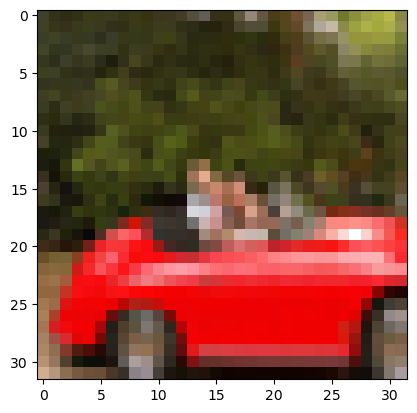

In [26]:
# plot the image
import matplotlib.pyplot as plt
plt.imshow(img)

#### Dataset Transforms

In [27]:
from torchvision import transforms

In [28]:
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [31]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [35]:
# Cifar10 transforms
tensor_cifar10 = datasets.CIFAR10(train_path, train=True, download=False,
                          transform=transforms.ToTensor())


In [37]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [38]:
img_t.shape,img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [39]:
img_t.min(),img_t.max()

(tensor(0.), tensor(1.))

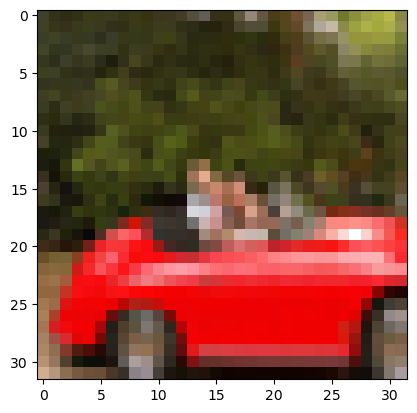

In [42]:
plt.imshow(img_t.permute(1,2,0))
plt.show()

It checks. Note how we have to use permute to change the order of the axes from C × H × W to H × W × C to match what Matplotlib expects.

each channel has zero mean and unitary standard devi- ation, we can compute the mean value and the standard deviation of each channel across the dataset and apply the following transform: v_n[c] = (v[c] - mean[c]) / stdev[c].

In [44]:
import torch

In [45]:
imgs = torch.stack([img_t for img_t,_ in tensor_cifar10], dim=3)

In [46]:
imgs

tensor([[[[0.2314, 0.6039, 1.0000,  ..., 0.1373, 0.7412, 0.8980],
          [0.1686, 0.4941, 0.9922,  ..., 0.1569, 0.7294, 0.9255],
          [0.1961, 0.4118, 0.9922,  ..., 0.1647, 0.7255, 0.9176],
          ...,
          [0.6196, 0.3569, 0.9922,  ..., 0.3882, 0.6863, 0.8510],
          [0.5961, 0.3412, 0.9922,  ..., 0.3098, 0.6745, 0.8667],
          [0.5804, 0.3098, 0.9922,  ..., 0.3490, 0.6627, 0.8706]],

         [[0.0627, 0.5490, 1.0000,  ..., 0.2235, 0.7608, 0.8706],
          [0.0000, 0.5686, 1.0000,  ..., 0.1725, 0.7490, 0.9373],
          [0.0706, 0.4902, 1.0000,  ..., 0.1961, 0.7451, 0.9137],
          ...,
          [0.4824, 0.3765, 1.0000,  ..., 0.6118, 0.6784, 0.8745],
          [0.4667, 0.3020, 1.0000,  ..., 0.5529, 0.6706, 0.8902],
          [0.4784, 0.2784, 1.0000,  ..., 0.4549, 0.6549, 0.8235]],

         [[0.0980, 0.5490, 1.0000,  ..., 0.3843, 0.8157, 0.8353],
          [0.0627, 0.5451, 0.9961,  ..., 0.2510, 0.8039, 0.9176],
          [0.1922, 0.4510, 0.9961,  ..., 0

In [47]:
imgs.size()

torch.Size([3, 32, 32, 50000])

In [65]:
imgs.view(3, -1).shape

torch.Size([3, 51200000])

In [51]:
imgs.view(3, -1)[0].shape

torch.Size([51200000])

32 * 32 * 50000 = 51200000

In [55]:
imgs[1][0]

tensor([[0.2431, 0.6941, 1.0000,  ..., 0.6980, 0.8275, 0.8980],
        [0.1804, 0.5373, 0.9922,  ..., 0.6902, 0.8157, 0.9294],
        [0.1882, 0.4078, 0.9922,  ..., 0.6902, 0.8118, 0.9255],
        ...,
        [0.5176, 0.3725, 0.9922,  ..., 0.6941, 0.7647, 0.8588],
        [0.4902, 0.3529, 0.9922,  ..., 0.5765, 0.7608, 0.8745],
        [0.4863, 0.3176, 0.9922,  ..., 0.5804, 0.7608, 0.8745]])

In [64]:
imgs.view(3, -1)[0]

tensor([0.2314, 0.6039, 1.0000,  ..., 0.0471, 0.7647, 0.6392])

In [69]:
# Mean and std
imgs.view(3, -1).mean(dim=1),imgs.view(3, -1).std(dim=1)

(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2470, 0.2435, 0.2616]))